In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import random 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing

import tensorflow as tf

tfk = tf.keras
tfkl = tf.keras.layers

In [2]:
file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C37.csv'

df_test = pd.read_csv(file, nrows=100)
float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
float32_cols = {c: np.float16 for c in float_cols}

df = pd.read_csv(file, dtype=float32_cols, engine='c')
df['id'] = df.id.astype('int32')
df = df.dropna()

In [3]:
df.head(10)

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,OAT,IAS,VSpd,NormAc,AltMSL,id,plane_id,split,date_diff,before_after
0,27.90625,27.90625,7.898438,0.700195,24.0,24.0,2.089844,129.250,61.15625,1191.0,...,7.199219,0.0,15.742188,-0.020004,822.5,2,18,4,-2,1
1,27.90625,27.90625,7.898438,0.600098,24.0,24.0,2.130859,129.250,61.18750,1192.0,...,7.199219,0.0,11.132812,-0.000000,822.5,2,18,4,-2,1
3,27.90625,27.90625,7.800781,0.600098,24.0,24.0,2.119141,129.250,61.15625,1190.0,...,7.199219,0.0,-30.640625,-0.029999,824.5,2,18,4,-2,1
4,27.90625,27.90625,7.699219,0.600098,24.0,24.0,2.080078,129.125,61.25000,1197.0,...,7.199219,0.0,-23.953125,-0.020004,825.0,2,18,4,-2,1
5,27.90625,27.90625,7.601562,0.600098,24.0,24.0,2.060547,129.125,61.12500,1190.0,...,7.000000,0.0,-6.941406,-0.010002,824.5,2,18,4,-2,1
6,27.90625,27.90625,7.800781,0.600098,24.0,24.0,2.119141,129.000,61.09375,1185.0,...,7.000000,0.0,-19.156250,0.010002,824.0,2,18,4,-2,1
7,27.90625,28.00000,7.800781,0.600098,24.0,24.0,2.060547,129.000,60.90625,1176.0,...,7.000000,0.0,-56.156250,-0.029999,824.0,2,18,4,-2,1
8,27.90625,27.90625,7.699219,0.600098,24.0,24.0,2.070312,129.000,61.00000,1178.0,...,7.000000,0.0,-19.406250,0.040009,824.5,2,18,4,-2,1
9,27.90625,27.90625,7.500000,0.600098,24.0,24.0,2.130859,128.875,60.87500,1174.0,...,7.000000,0.0,7.628906,0.010002,824.5,2,18,4,-2,1
10,27.90625,27.90625,7.500000,0.600098,24.0,24.0,2.039062,128.750,61.06250,1177.0,...,7.000000,0.0,-19.406250,0.020004,825.0,2,18,4,-2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13204962 entries, 0 to 13414565
Data columns (total 28 columns):
 #   Column        Dtype  
---  ------        -----  
 0   volt1         float16
 1   volt2         float16
 2   amp1          float16
 3   amp2          float16
 4   FQtyL         float16
 5   FQtyR         float16
 6   E1 FFlow      float16
 7   E1 OilT       float16
 8   E1 OilP       float16
 9   E1 RPM        float16
 10  E1 CHT1       float16
 11  E1 CHT2       float16
 12  E1 CHT3       float16
 13  E1 CHT4       float16
 14  E1 EGT1       float16
 15  E1 EGT2       float16
 16  E1 EGT3       float16
 17  E1 EGT4       float16
 18  OAT           float16
 19  IAS           float16
 20  VSpd          float16
 21  NormAc        float16
 22  AltMSL        float16
 23  id            int32  
 24  plane_id      int64  
 25  split         int64  
 26  date_diff     int64  
 27  before_after  int64  
dtypes: float16(23), int32(1), int64(4)
memory usage: 1.1 GB


In [5]:
df.describe()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,OAT,IAS,VSpd,NormAc,AltMSL,id,plane_id,split,date_diff,before_after
count,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,13204962.0,...,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,13204962.0,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07,1.320496e+07
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.998311e+03,3.068508e+01,1.885861e+00,1.793400e-01,3.978579e-01
std,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,...,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,1.726202e+03,1.957339e+01,1.409635e+00,1.443981e+00,4.894558e-01
min,1.220312e+01,2.029688e+01,-2.650000e+01,-3.300781e+00,1.999512e-01,3.798828e-01,0.000000e+00,2.170312e+01,-1.372656e+01,0.0,...,-3.500000e+01,-1.669922e+00,-1.054400e+04,-1.330078e+00,-1551.0,2.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00
25%,2.800000e+01,2.800000e+01,3.000488e-01,0.000000e+00,1.606250e+01,1.876562e+01,2.570312e+00,1.370000e+02,6.081250e+01,1211.0,...,-1.000000e+00,3.909375e+01,-1.375000e+02,-2.000427e-02,879.0,1.529000e+03,1.300000e+01,1.000000e+00,-1.000000e+00,0.000000e+00
50%,2.809375e+01,2.809375e+01,7.998047e-01,0.000000e+00,1.856250e+01,2.131250e+01,7.570312e+00,1.512500e+02,6.856250e+01,2234.0,...,9.500000e+00,8.600000e+01,-8.798828e-01,-0.000000e+00,2118.0,2.980000e+03,3.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00
75%,2.809375e+01,2.809375e+01,1.500000e+00,9.997559e-02,2.123438e+01,2.323438e+01,9.421875e+00,1.646250e+02,7.137500e+01,2452.0,...,1.779688e+01,1.029375e+02,9.606250e+01,2.999878e-02,3570.0,4.449000e+03,4.700000e+01,3.000000e+00,1.000000e+00,1.000000e+00
max,3.000000e+01,3.170312e+01,6.350000e+01,3.300781e+00,2.400000e+01,2.400000e+01,1.701562e+01,2.117500e+02,1.000000e+02,2950.0,...,4.018750e+01,1.645000e+02,4.480000e+03,2.390625e+00,14544.0,6.083000e+03,6.900000e+01,4.000000e+00,2.000000e+00,1.000000e+00


In [6]:
df_visual= df.head(5000).drop(['id','plane_id','split','date_diff','before_after'],axis=1)

C:\Users\47008\AppData\Local\Temp/ipykernel_5756/519855737.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


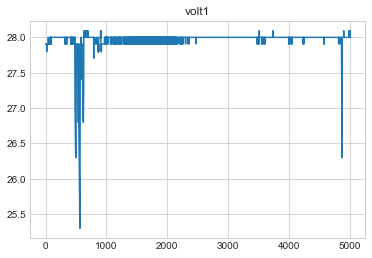

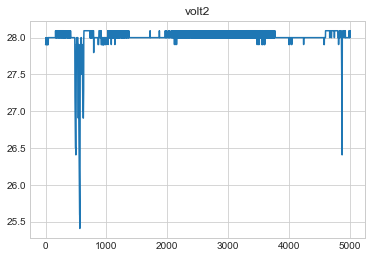

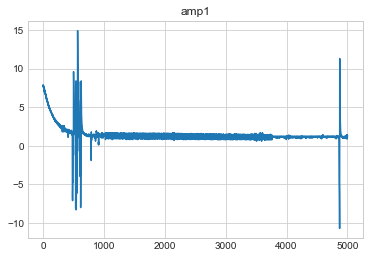

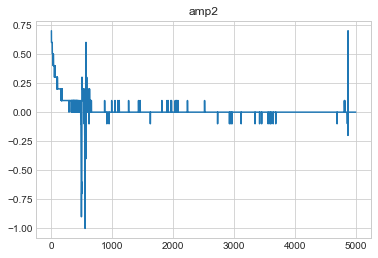

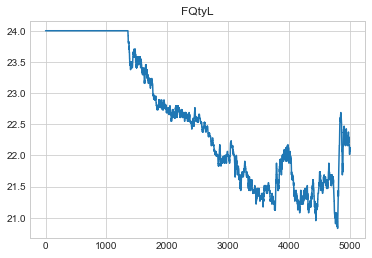

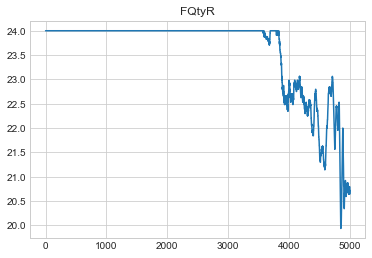

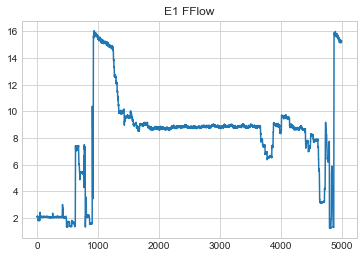

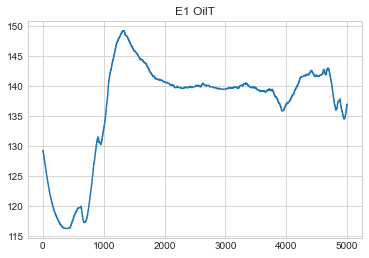

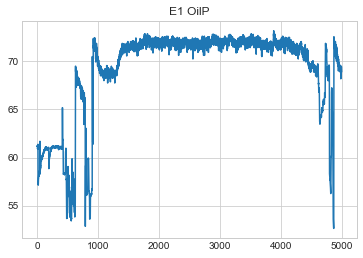

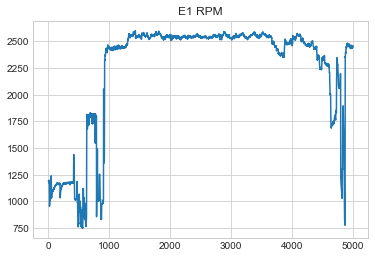

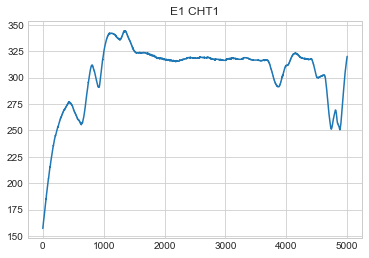

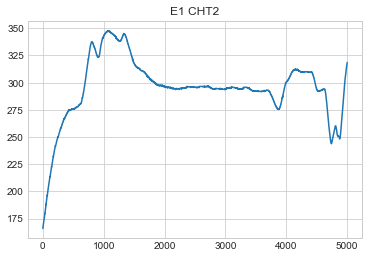

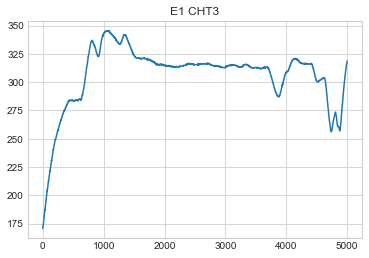

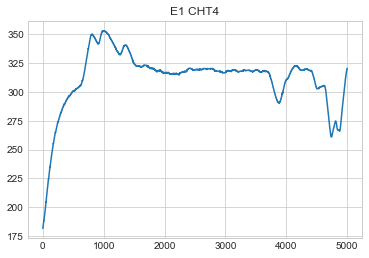

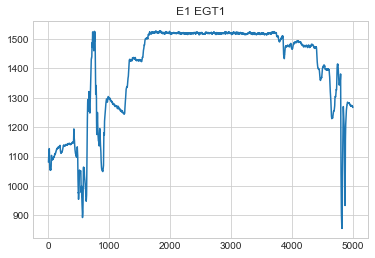

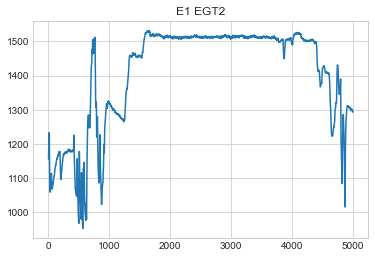

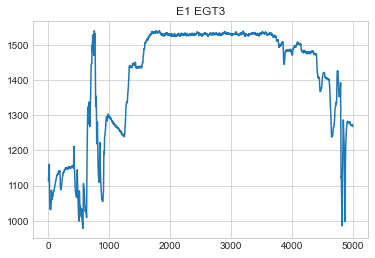

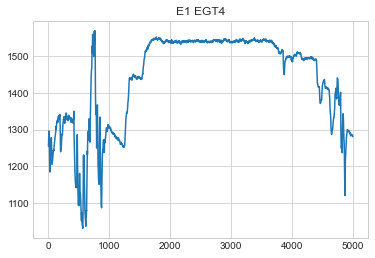

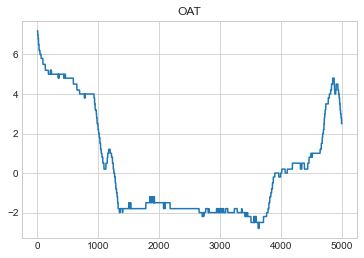

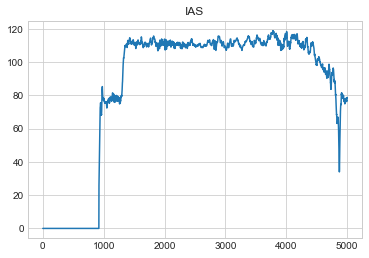

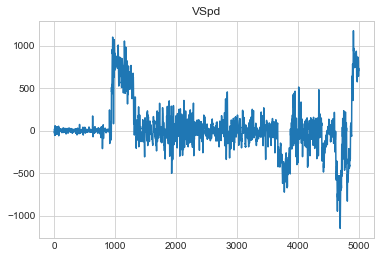

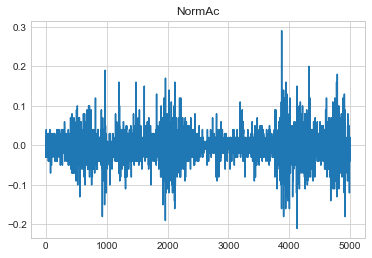

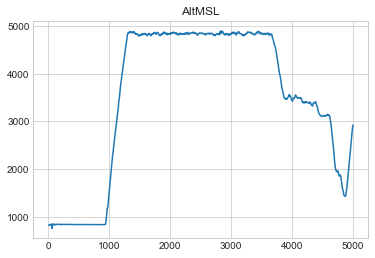

In [7]:
for col in df_visual.columns:
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    ax = plt.axes()
    plt.title(col)

    x = np.linspace(0, df_visual.shape[0])
    ax.plot(df_visual[col])

In [8]:
sources = df[['id', 'plane_id', 'split', 'date_diff', 'before_after']].drop_duplicates()
sources.loc[: , ['split', 'before_after', 'id']].groupby(['split', 'before_after']).count()

id
split before_after     
0     0             318
      1             224
1     0             246
      1             171
2     0             323
      1             252
3     0             256
      1             162
4     0             270
      1             167

In [9]:
input_columns = ['volt1',
 'volt2',
 'amp1',
 'amp2',
 'FQtyL',
 'FQtyR',
 'E1 FFlow',
 'E1 OilT',
 'E1 OilP',
 'E1 RPM',
 'E1 CHT1',
 'E1 CHT2',
 'E1 CHT3',
 'E1 CHT4',
 'E1 EGT1',
 'E1 EGT2',
 'E1 EGT3',
 'E1 EGT4',
 'OAT',
 'IAS',
 'VSpd',
 'NormAc',
 'AltMSL']

In [10]:
BATCH_SIZE = 32
SHAPE = (4096, 23)
BLOCK_SHAPE = (128, 23)
EPOCHS = 10
VARIABLES = 23
NFOLD = 5 
STEPS_PER_EPOCH = 50

In [11]:
preprocess = preprocessing.MinMaxScaler()
preprocess.fit(df.loc[:, input_columns].sample(100000, random_state = 0 ))
org_value = df.loc[:, input_columns].values
res = preprocess.transform(org_value)
for i, col in enumerate(input_columns):
    df.loc[:, col] = res[:, i]

C:\Users\47008\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [12]:
def get_dataset(df): 

    ids = df.id.unique()

    sensor_datas = []
    afters = [] 

    for id in ids: 
        sensor_data = df[df.id == id].iloc[-SHAPE[0]:, :23].values

        sensor_data = np.pad(sensor_data, [[0, SHAPE[0]- len(sensor_data)], [0,0]])

        sensor_data = tf.convert_to_tensor(sensor_data, dtype = tf.float32) 

        after = df[df.id == id]['before_after'].iloc[0]

        sensor_datas.append(sensor_data)
        afters.append(after)


    sensor_datas = tf.stack(sensor_datas)
    afters = np.stack(afters)

    ds = tf.data.Dataset.from_tensor_slices( (sensor_datas, afters))
    
    return ds

In [13]:
def slice_random(x, y):
    start = tf.random.uniform(shape=[], minval=0, maxval=4096-BLOCK_SHAPE[0], dtype=tf.int64)
    x = x[start: start + BLOCK_SHAPE[0]]
    x = tf.reshape(x, (BLOCK_SHAPE))
    return x, y 

In [14]:
def fix_type(x, y):

    return tf.cast(x, tf.float32), tf.cast(y, tf.float32)

In [15]:
def prepare_for_training(ds, shuffle = False, repeat = False, predict= True):
    
    ds = ds.map(fix_type)
    ds = ds.map(slice_random)

    ds = ds.shuffle(512) if shuffle else ds 
    ds = ds.repeat() if repeat else ds 
    ds = ds.batch(BATCH_SIZE, drop_remainder=True)

    if not predict: 
        ds = ds.map(lambda x, y : (x, x) ) 
    else: 
        ds = ds.map(lambda x, y : (x, tf.reshape(y, (-1, 1))) )
         
    return ds

In [16]:
def get_train_and_val_for_fold(folded_datasets, fold):
    predict = True

    train = []
    for i in range(NFOLD-1): 
        if i == fold:
            val_ds = folded_datasets[i][0].concatenate(folded_datasets[i][1])
        else: 
            train.append(folded_datasets[i][0])
    
    test_ds = folded_datasets[4][0].concatenate(folded_datasets[4][1])
    
    train_ds = None
    for ds in train: 
        train_ds = ds if train_ds is None else train_ds.concatenate(ds)

    test_ds = prepare_for_training(test_ds, shuffle=False)
    train_ds = prepare_for_training(train_ds, shuffle=True, repeat = True)
    val_ds = prepare_for_training(val_ds, shuffle=False)
    
    return train_ds, val_ds, test_ds

In [17]:
folded_datasets = []

for i in range(NFOLD):
    after = get_dataset(df[(df.split == i) & (df.before_after == 1)])
    before = get_dataset(df[(df.split == i) & (df.before_after == 0)])
    folded_datasets.append((after, before))

In [18]:
def conv_model_long(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(256, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(512, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(512, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(256, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model                      

In [19]:
def conv_model_short(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(128, 7, strides = 1, activation='relu'),
                                            tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                                            tf.keras.layers.GlobalAveragePooling1D(),
                                            tfkl.Dense(1, activation='sigmoid'),
    ])
    return model

In [20]:
cnn_long_result = {}
for i in range(NFOLD-1):   
    model= conv_model_long()
    model.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                    metrics = [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.AUC(curve = 'PR')], 
                    loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                    )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_long_cnn = model.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_long_result[i] = res_long_cnn.history
    
pd.DataFrame(cnn_long_result)

Epoch 1/10
50/50 [==============================] - 16s 310ms/step - loss: 0.2305 - root_mean_squared_error: 0.4801 - auc: 1.0000 - val_loss: 0.2566 - val_root_mean_squared_error: 0.5065 - val_auc: 0.4428
Epoch 2/10
50/50 [==============================] - 15s 306ms/step - loss: 0.1952 - root_mean_squared_error: 0.4418 - auc: 1.0000 - val_loss: 0.2672 - val_root_mean_squared_error: 0.5169 - val_auc: 0.4740
Epoch 3/10
50/50 [==============================] - 15s 307ms/step - loss: 0.1577 - root_mean_squared_error: 0.3971 - auc: 1.0000 - val_loss: 0.2856 - val_root_mean_squared_error: 0.5344 - val_auc: 0.4634
Epoch 4/10
50/50 [==============================] - 15s 310ms/step - loss: 0.1161 - root_mean_squared_error: 0.3408 - auc: 1.0000 - val_loss: 0.3167 - val_root_mean_squared_error: 0.5628 - val_auc: 0.4414
Epoch 5/10
50/50 [==============================] - 16s 311ms/step - loss: 0.0756 - root_mean_squared_error: 0.2749 - auc: 1.0000 - val_loss: 0.3619 - val_root_mean_squared_error: 

50/50 [==============================] - 15s 309ms/step - loss: 0.0162 - root_mean_squared_error: 0.1274 - auc_3: 1.0000 - val_loss: 0.5213 - val_root_mean_squared_error: 0.7220 - val_auc_3: 0.3945


,0,1,2,3
loss,"[0.2304709404706955, 0.19522877037525177, 0.15...","[0.23113031685352325, 0.2103443741798401, 0.18...","[0.24982675909996033, 0.23852287232875824, 0.2...","[0.23275966942310333, 0.20615093410015106, 0.1..."
root_mean_squared_error,"[0.4800738990306854, 0.4418469965457916, 0.397...","[0.4807601571083069, 0.458633154630661, 0.4297...","[0.49982672929763794, 0.4883880317211151, 0.47...","[0.48245173692703247, 0.45403847098350525, 0.4..."
auc,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999403953...",NaN,NaN,NaN
val_loss,"[0.2565922737121582, 0.2671951353549957, 0.285...","[0.2556875944137573, 0.26215094327926636, 0.27...","[0.25059205293655396, 0.25169041752815247, 0.2...","[0.2586733102798462, 0.26773136854171753, 0.28..."
val_root_mean_squared_error,"[0.5065493583679199, 0.5169092416763306, 0.534...","[0.5056555867195129, 0.5120067596435547, 0.523...","[0.5005916953086853, 0.5016875863075256, 0.502...","[0.5085993409156799, 0.5174276232719421, 0.531..."
val_auc,"[0.4427778124809265, 0.4739583432674408, 0.463...",NaN,NaN,NaN
auc_1,NaN,"[1.0, 1.0, 0.9999999403953552, 1.0, 1.0, 0.999...",NaN,NaN
val_auc_1,NaN,"[0.4226405620574951, 0.4291001558303833, 0.397...",NaN,NaN
auc_2,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999403953...",NaN
val_auc_2,NaN,NaN,"[0.44461309909820557, 0.4647901654243469, 0.48...",NaN


In [21]:
cnn_short_result = {}
for i in range(NFOLD-1):   
    model= conv_model_short()
    model.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                    metrics = [tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.AUC(curve = 'PR')], 
                    loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                    )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_short_cnn = model.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_short_result[i] = res_short_cnn.history
    
pd.DataFrame(cnn_short_result)

Epoch 1/10
50/50 [==============================] - 2s 36ms/step - loss: 0.2798 - root_mean_squared_error: 0.5290 - auc_4: 1.0000 - val_loss: 0.2480 - val_root_mean_squared_error: 0.4980 - val_auc_4: 0.4361
Epoch 2/10
50/50 [==============================] - 2s 32ms/step - loss: 0.2625 - root_mean_squared_error: 0.5123 - auc_4: 1.0000 - val_loss: 0.2498 - val_root_mean_squared_error: 0.4998 - val_auc_4: 0.4260
Epoch 3/10
50/50 [==============================] - 2s 32ms/step - loss: 0.2461 - root_mean_squared_error: 0.4961 - auc_4: 1.0000 - val_loss: 0.2519 - val_root_mean_squared_error: 0.5019 - val_auc_4: 0.4363
Epoch 4/10
50/50 [==============================] - 2s 32ms/step - loss: 0.2308 - root_mean_squared_error: 0.4805 - auc_4: 1.0000 - val_loss: 0.2545 - val_root_mean_squared_error: 0.5045 - val_auc_4: 0.4535
Epoch 5/10
50/50 [==============================] - 2s 32ms/step - loss: 0.2165 - root_mean_squared_error: 0.4653 - auc_4: 1.0000 - val_loss: 0.2577 - val_root_mean_squared

50/50 [==============================] - 2s 32ms/step - loss: 0.1521 - root_mean_squared_error: 0.3900 - auc_7: 1.0000 - val_loss: 0.2914 - val_root_mean_squared_error: 0.5398 - val_auc_7: 0.3873


,0,1,2,3
loss,"[0.27982446551322937, 0.2624582350254059, 0.24...","[0.2759845554828644, 0.25905928015708923, 0.24...","[0.19668033719062805, 0.18436279892921448, 0.1...","[0.2412486970424652, 0.23134852945804596, 0.22..."
root_mean_squared_error,"[0.5289843678474426, 0.5123067498207092, 0.496...","[0.5253423452377319, 0.5089786648750305, 0.492...","[0.4434865713119507, 0.42937490344047546, 0.41...","[0.491170734167099, 0.4809870421886444, 0.4709..."
auc_4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN,NaN,NaN
val_loss,"[0.24798764288425446, 0.24977189302444458, 0.2...","[0.24727967381477356, 0.2494208961725235, 0.25...","[0.2584739029407501, 0.2613970637321472, 0.263...","[0.25354859232902527, 0.25614839792251587, 0.2..."
val_root_mean_squared_error,"[0.49798357486724854, 0.4997718334197998, 0.50...","[0.49727222323417664, 0.49942055344581604, 0.5...","[0.5084033012390137, 0.5112700462341309, 0.513...","[0.5035361051559448, 0.5061110258102417, 0.508..."
val_auc_4,"[0.4361400008201599, 0.42595598101615906, 0.43...",NaN,NaN,NaN
auc_5,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN,NaN
val_auc_5,NaN,"[0.4051654636859894, 0.43588021397590637, 0.46...",NaN,NaN
auc_6,NaN,NaN,"[0.9999999403953552, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
val_auc_6,NaN,NaN,"[0.46418654918670654, 0.5111257433891296, 0.53...",NaN


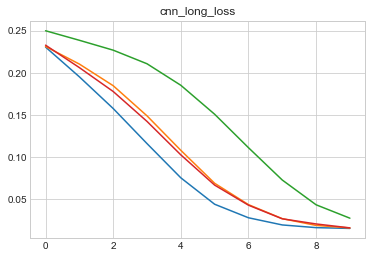

In [22]:
plt.title('cnn_long_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['loss'])

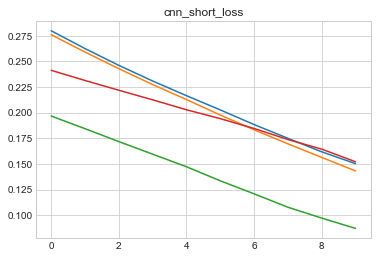

In [23]:
plt.title('cnn_short_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['loss'])

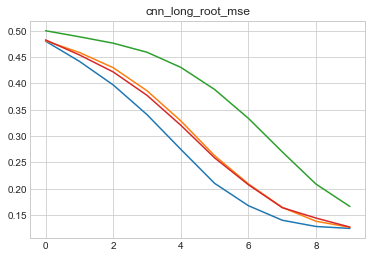

In [24]:
plt.title("cnn_long_root_mse")
for i in range(4):
    plt.plot(cnn_long_result[i]['root_mean_squared_error'])

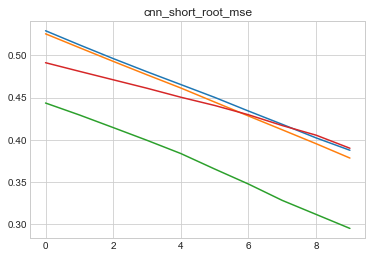

In [25]:
plt.title("cnn_short_root_mse")
for i in range(4):
    plt.plot(cnn_short_result[i]['root_mean_squared_error'])

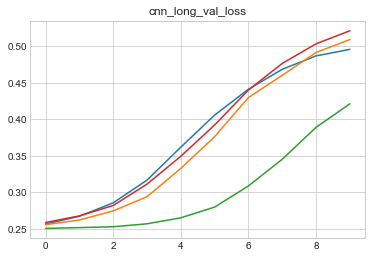

In [26]:
plt.title('cnn_long_val_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['val_loss'])

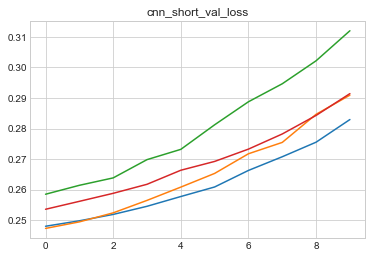

In [27]:
plt.title('cnn_short_val_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['val_loss'])

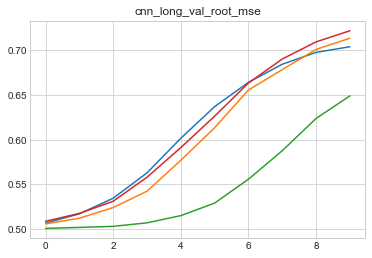

In [28]:
plt.title("cnn_long_val_root_mse")
for i in range(4):
    plt.plot(cnn_long_result[i]['val_root_mean_squared_error'])

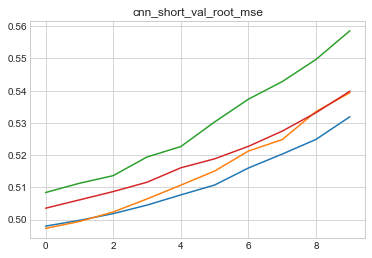

In [29]:
plt.title("cnn_short_val_root_mse")
for i in range(4):
    plt.plot(cnn_short_result[i]['val_root_mean_squared_error'])

In [30]:
for i in range(4):
    score_long = np.asarray(cnn_long_result[i]['loss'])
    loss_long_score =  np.median(score_long, axis=0)
    score_short = np.asarray(cnn_short_result[i]['loss'])
    loss_short_score = np.median(score_short, axis=0)

In [31]:
loss_long_score

0.0848432295024395

In [32]:
loss_short_score

0.19847016036510468